In [50]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.facecolor']='white'

In [51]:
iris = datasets.load_iris()

In [52]:
X = iris.data[:, :2]
y = iris.target

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [54]:
kernel = 1.0 * RBF(1.0)
clf = GaussianProcessClassifier(kernel=kernel).fit(X_train, y_train)

In [55]:
h = 0.02  # step size in the mesh


# create a mesh to plot in
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [62]:
# Predict
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

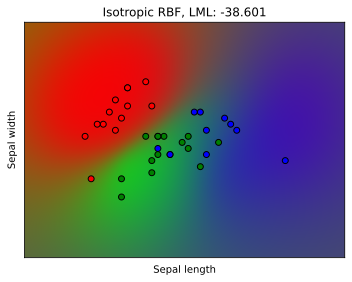

In [63]:
Z = Z.reshape((xx.shape[0], xx.shape[1], 3))

plt.figure(figsize=(5, 5))
plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=np.array(["r", "g", "b"])[y_test], edgecolors=(0, 0, 0))
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(
    "%s, LML: %.3f" % ("Isotropic RBF", clf.log_marginal_likelihood(clf.kernel_.theta))
)
plt.tight_layout()
# plt.legend()
plt.show()

<AxesSubplot: >

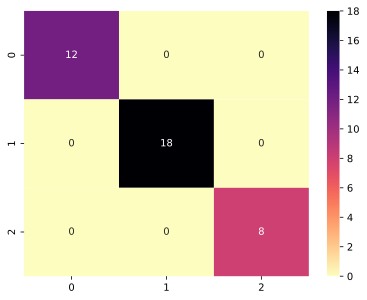

In [68]:
sns.heatmap(confusion_matrix(clf.predict(X_test), y_pred), annot=True, cmap="magma_r")